<a href="https://colab.research.google.com/github/JASCRAJ/Sketch-literature/blob/main/150224_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xml.etree.ElementTree as ET

def sort_and_save_by_color(svg_path):
    tree = ET.parse(svg_path)
    root = tree.getroot()
    svg_width = root.get('width')
    svg_height = root.get('height')

    # Dictionary to store paths grouped by color
    paths_by_color = {}

    # Iterate through each <path> element
    for path in root.findall(".//path"):
        style = path.get("style")
        color = style.split(";")[0].split(":")[1]

        # Add the path to the corresponding color group
        if color not in paths_by_color:
            paths_by_color[color] = []
        paths_by_color[color].append(path)

    # Create a new SVG file for each color group
    for color, paths in paths_by_color.items():
        new_svg = ET.Element("svg", xmlns="http://www.w3.org/2000/svg", version="1.1", width=svg_width, height=svg_height)
        new_svg.extend(paths)

        # Save the new SVG file with the color in the filename
        output_file_path = f"/content/output_{color}.svg"
        ET.ElementTree(new_svg).write(output_file_path)

        print(f"Saved {len(paths)} paths with color {color} to {output_file_path}")

# Replace '/content/d7597_sketch_2_c_4.svg' with the actual path to your SVG file
sort_and_save_by_color('/content/d7597_sketch_1 (11).svg')


Saved 117 paths with color #fbfbfb to /content/output_#fbfbfb.svg
Saved 116 paths with color #4f4f4f to /content/output_#4f4f4f.svg


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import re

def extract_numeric_values(s):
    # Use regular expression to extract numeric values
    return re.findall(r'[-+]?\d*\.\d+|\d+', s)

def parse_svg(svg_file):
    tree = ET.parse(svg_file)
    root = tree.getroot()

    # Extract width and height attributes from the SVG root element
    svg_width = root.get('width')
    svg_height = root.get('height')

    paths = []

    # Iterate through path elements
    for path_elem in root.findall('.//{http://www.w3.org/2000/svg}path'):
        path_data = path_elem.get('d')
        style = path_elem.get('style')

        # Extract numeric values from path_data using the custom function
        numeric_values = extract_numeric_values(path_data)

        # Extract the second and third elements
        M_x = numeric_values[0] if len(numeric_values) > 1 else None
        M_y = numeric_values[1] if len(numeric_values) > 2 else None

        # Calculate the length of the path data
        path_length = len(path_data)

        paths.append({
            'path_data': path_data,
            'style': style,
            'X_value': M_x,
            'Y_value': M_y,
            'path_length': path_length  # Add path length to the dictionary
        })

    # Create DataFrame from paths list
    df = pd.DataFrame(paths)

    # Add width and height to the DataFrame
    df['width'] = svg_width
    df['height'] = svg_height

    # Sort DataFrame based on 'path_length' in descending order
    df.sort_values(by='path_length', ascending=False, inplace=True)

    return df

def save_to_csv(dataframe, csv_filename):
    dataframe.to_csv(csv_filename, index=False)

# Replace '/content/Laura_sketch_1 (12).svg' with the actual path to your SVG file
svg_file_path = '/content/output_#4f4f4f.svg'

# Parse SVG paths and create a DataFrame
df = parse_svg(svg_file_path)

# Replace 'output.csv' with the desired CSV file name
csv_filename = '/content/csv_output.csv'

# Save DataFrame to CSV
save_to_csv(df, csv_filename)


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import re

def extract_numeric_values(s):
    # Use regular expression to extract numeric values
    return re.findall(r'[-+]?\d*\.\d+|\d+', s)

def parse_svg(svg_file):
    tree = ET.parse(svg_file)
    root = tree.getroot()

    # Extract width and height attributes from the SVG root element
    svg_width = root.get('width')
    svg_height = root.get('height')

    paths = []

    # Iterate through path elements
    for path_elem in root.findall('.//{http://www.w3.org/2000/svg}path'):
        path_data = path_elem.get('d')
        style = path_elem.get('style')

        # Extract numeric values from path_data using the custom function
        numeric_values = extract_numeric_values(path_data)

        # Extract the second and third elements
        M_x = numeric_values[0] if len(numeric_values) > 1 else None
        M_y = numeric_values[1] if len(numeric_values) > 2 else None

        # Calculate the length of the path data
        path_length = len(path_data)

        paths.append({
            'path_data': path_data,
            'style': style,
            'X_value': M_x,
            'Y_value': M_y,
            'path_length': path_length  # Add path length to the dictionary
        })

    # Create DataFrame from paths list
    df = pd.DataFrame(paths)

    # Add width and height to the DataFrame
    df['width'] = svg_width
    df['height'] = svg_height

    # Sort DataFrame based on 'path_length' in descending order
    df.sort_values(by='path_length', ascending=False, inplace=True)

    return df

def save_to_csv(dataframe, csv_filename):
    dataframe.to_csv(csv_filename, index=False)

# Replace '/content/Laura_sketch_1 (12).svg' with the actual path to your SVG file
svg_file_path = '/content/d7597_sketch_1_0503_4.svg'

# Parse SVG paths and create a DataFrame
df = parse_svg(svg_file_path)
print(df.head())

# Split DataFrame based on path_length condition
subset_path_length_gt_2000 = df[df['path_length'] > 2000]
subset_path_length_le_2000 = df[df['path_length'] <= 2000]

# Replace 'subset_path_length_gt_2000.csv' and 'subset_path_length_le_2000.csv' with desired filenames
save_to_csv(subset_path_length_gt_2000, '/content/drive/MyDrive/060224_input/160224/d7597_sketch_1_subset_path_length_gt_2000.csv')
save_to_csv(subset_path_length_le_2000, '/content/drive/MyDrive/060224_input/160224/d7597_sketch_1_subset_path_length_le_2000.csv')


                                             path_data  \
51   M222 135C219.827 137.283 216.856 138.509 215 1...   
1    M292 69L292 70L295 70C293.752 69.3152 293.452 ...   
537  M226 206L227 209C222.054 209.464 220.05 215.25...   
919  M424 241C422.802 242.245 422.866 242.074 421 2...   
290  M457 179L456 180L456 181L457 182L458 182L459 1...   

                          style X_value Y_value  path_length width height  
51   fill:#252525; stroke:none;     222     135         1837   572    560  
1    fill:#a2a2a2; stroke:none;     292      69         1810   572    560  
537  fill:#a2a2a2; stroke:none;     226     206         1689   572    560  
919  fill:#252525; stroke:none;     424     241         1236   572    560  
290  fill:#a2a2a2; stroke:none;     457     179         1108   572    560  


In [ ]:
import pandas as pd
import xml.etree.ElementTree as ET

def create_svg_file(data, filename, width, height):
    # Create the root SVG element with the necessary attributes
    root = ET.Element("svg", xmlns="http://www.w3.org/2000/svg", version="1.1", width=str(width), height=str(height))

    # Iterate over the DataFrame rows and create path elements
    for index, row in data.iterrows():
        path_elem = ET.SubElement(root, "path")
        path_elem.set("d", row["path_data"])
        #path_elem.set("style", row["style"])
        path_elem.set("style", "fill: 252525; stroke: none;")

    # Write the SVG file
    tree = ET.ElementTree(root)
    tree.write(filename)

# Read the CSV file
csv_filename = '/content/subset_path_length_gt_2000.csv'
df = pd.read_csv(csv_filename)

# Define width and height for SVG file
svg_width = df['width'].iloc[0]
svg_height = df['height'].iloc[0]
# Create SVG file
filename_head = 'output_head.svg'
create_svg_file(df, filename_head, svg_width, svg_height)


In [ ]:
!pip install cairosvg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 4.1 MB/s eta 0:00:00


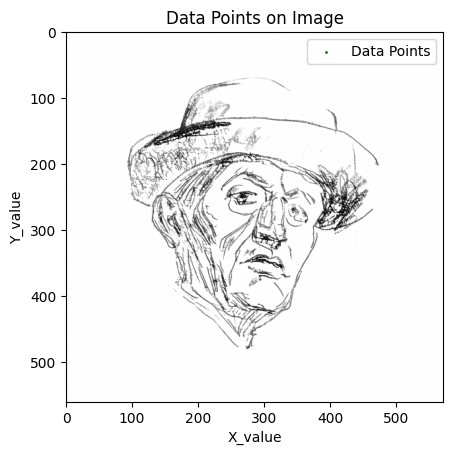

ValueError: Unsupported dtype object

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import cairosvg


def extract_numeric_values(s):
    # Use regular expression to extract numeric values
    return re.findall(r'[-+]?\d*\.\d+|\d+', s)

# def parse_svg(svg_file):
#     tree = ET.parse(svg_file)
#     root = tree.getroot()

#     paths = []

#     # Iterate through path elements
#     for path_elem in root.findall('.//{http://www.w3.org/2000/svg}path'):
#         path_data = path_elem.get('d')
#         style = path_elem.get('style')

#         # Extract numeric values from path_data using the custom function
#         numeric_values = extract_numeric_values(path_data)

#         # Extract the second and third elements
#         M_x = numeric_values[0] if len(numeric_values) > 1 else None
#         M_y = numeric_values[1] if len(numeric_values) > 2 else None

#         paths.append({
#             'path_data': path_data,
#             'style': style,
#             'X_value': M_x,
#             'Y_value': M_y,
#         })

#     return pd.DataFrame(paths)

# def save_to_csv(dataframe, csv_filename):
#     dataframe.to_csv(csv_filename, index=False)

def plot_data_on_image(csv_file_path, image_file_path):
    df = pd.read_csv(csv_file_path)
    img = mpimg.imread(image_file_path)
    plt.imshow(img, cmap='gray')
    plt.scatter(df['X_value'], df['Y_value'], color='green', marker='o', label='Data Points', s=1)
    plt.title('Data Points on Image')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.legend()
    plt.show()

def hierarchical_clustering(csv_file_path, image_file_path, max_distance=300):
    df = pd.read_csv(csv_file_path)
    distances = pdist(df[['X_value', 'Y_value']])
    linkage_matrix = linkage(distances, method='ward')
    clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')
    df['Cluster'] = clusters
    df_sorted = df.sort_values(by='Cluster')
    img = mpimg.imread(image_file_path)
    plt.imshow(img, cmap='gray')
    plt.scatter(df_sorted['X_value'], df_sorted['Y_value'], c=df_sorted['Cluster'], cmap='viridis', marker='o', label='Data Points', s=10)
    plt.title('Data Points on Image with Hierarchical Clustering (Sorted)')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()
    num_clusters = len(set(clusters))
    print("Number of clusters:", num_clusters)
    return df_sorted

def save_sorted_csv(df_sorted, output_csv_path):
    df_sorted.to_csv(output_csv_path, index=False)
def get_svg_width_height(svg_file):
    tree = ET.parse(svg_file)
    root = tree.getroot()
    width = root.attrib.get('width')
    height = root.attrib.get('height')
    return width, height


def save_svg_and_png_files(df_sorted, output_dir_svg, output_dir_png, svg_file_path):
    os.makedirs(output_dir_svg, exist_ok=True)
    os.makedirs(output_dir_png, exist_ok=True)
    width, height = get_svg_width_height(svg_file_path)
    cumulative_svg_content = f'<svg xmlns="http://www.w3.org/2000/svg" width="{width}" height="{height}">'
    grouped_clusters = df_sorted.groupby('Cluster')

    for cluster, group in grouped_clusters:
        paths_data = group['path_data'].tolist()
        styles = group['style'].tolist()

        svg_content = ''

        for path_data, style in zip(paths_data, styles):
            svg_content += f'<path d="{path_data}" style="{style}" />\n'

        cumulative_svg_content += svg_content
        f_content_gt = cumulative_svg_content + '</svg>'

        svg_file_path = os.path.join(output_dir_svg, f'accumulated_clusters_1_{cluster}.svg')
        with open(svg_file_path, 'w') as f:
            f.write(f_content_gt)

        png_file_path = os.path.join(output_dir_png, f'accumulated_clusters_1_{cluster}.png')
        cairosvg.svg2png(url=svg_file_path, write_to=png_file_path)
    return cumulative_svg_content
    #print(cumulative_svg_content)

# Example usage:
# Define common path
common_path = '/content/drive/MyDrive/060224_input/160224'
File_name = 'd7597_sketch_1'

# svg_file_path = os.path.join(common_path, File_name + '.svg')
csv_file_path = os.path.join(common_path, File_name + '_subset_path_length_gt_2000.csv')
image_file_path = os.path.join(common_path, File_name + '.png')
output_csv_path = os.path.join(common_path, File_name +'output_sorted.csv')
svg_output_dir = os.path.join(common_path, File_name + 'svg_files')
png_output_dir = os.path.join(common_path, File_name +'png_files')

# Parse SVG paths and create a DataFrame
#df = parse_svg(svg_file_path)
#save_to_csv(df, csv_file_path)

# Plot data points on image
plot_data_on_image(csv_file_path, image_file_path)

# Perform hierarchical clustering and visualize
df_sorted = hierarchical_clustering(csv_file_path, image_file_path)
# Save sorted DataFrame to CSV
save_sorted_csv(df_sorted, output_csv_path)

# Save SVG and PNG files
# Call the function with the corrected argument
p_data = save_svg_and_png_files(df_sorted, svg_output_dir, png_output_dir, svg_file_path)
#print(p_data)
#save_svg_and_png_files(df_sorted, svg_output_dir)


In [ ]:
print(p_data)

<svg xmlns="http://www.w3.org/2000/svg" width="572" height="560"><path d="M315 379C318.438 386.506 324.738 392.207 328 400L329 400C327.051 391.796 321.811 383.969 315 379M169 382L169 384L171 384L171 382L169 382M277 383L277 384L282 383C279.956 382.226 279.155 382.408 277 383M174 383C175.161 393.418 190.161 402.49 200 403L200 402C189.562 399.498 179.695 391.916 174 383M190 385C193.389 402.102 219.968 410.056 230 424L231 424L228 418C229.186 419.186 229.584 419.528 231 420C229.358 417.884 223.104 414.24 224 412L224 411C211.825 408.644 203.202 391.48 192 391C191.826 388.388 191.582 387.057 190 385M342 390C341.014 391.479 341 391.203 341 393C342.289 391.557 342.401 391.766 342 390M249 395L249 396C259.517 399.203 265.94 404.332 274 412C267.667 409.847 264.73 403.901 259 401C264.675 410.876 278.669 416.939 274 428L275 428C277.879 424.397 283.323 418.417 287 424L288 424C293.032 419.522 302.128 422.336 306 427C302.274 426.643 300.734 427.699 299 431C301.963 429.485 304.853 428.09 308 427C310.33 

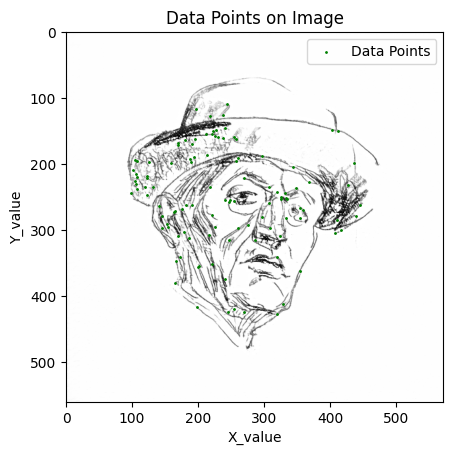

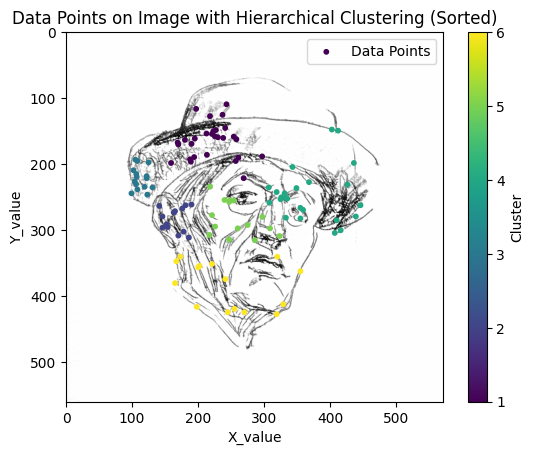

Number of clusters: 6
                                            path_data  \
54  M237 125C238.752 123.67 239.67 122.753 241 121...   
27  M221 154L221 155C223.686 155.501 226.27 155.88...   
32  M257 195C257 196.797 257.014 196.521 258 198L2...   
38  M254 158L255 162C251.107 161.118 248.858 161.0...   
44  M212.667 153.333C212.222 153.778 213.278 153.7...   
..                                                ...   
12  M200 356C201.777 368.074 207.481 381.163 213 3...   
61  M320 340C320.459 343.611 321.639 346.641 323 3...   
62  M270 424L268 428C270.118 426.782 270.845 426.1...   
50  M165 380C166.58 379.316 166.777 379.195 168 37...   
65  M198 416C202.772 422.774 209.918 429.6 218 432...   

                         style  X_value  Y_value  path_length  width  height  \
54  fill:#4f4f4f; stroke:none;  237.000  125.000          190    572     560   
27  fill:#4f4f4f; stroke:none;  221.000  154.000          335    572     560   
32  fill:#4f4f4f; stroke:none;  257.000  195.000     

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import cairosvg



def extract_numeric_values(s):
    # Use regular expression to extract numeric values
    return re.findall(r'[-+]?\d*\.\d+|\d+', s)

# def parse_svg(svg_file):
#     tree = ET.parse(svg_file)
#     root = tree.getroot()

#     paths = []

#     # Iterate through path elements
#     for path_elem in root.findall('.//{http://www.w3.org/2000/svg}path'):
#         path_data = path_elem.get('d')
#         style = path_elem.get('style')

#         # Extract numeric values from path_data using the custom function
#         numeric_values = extract_numeric_values(path_data)

#         # Extract the second and third elements
#         M_x = numeric_values[0] if len(numeric_values) > 1 else None
#         M_y = numeric_values[1] if len(numeric_values) > 2 else None

#         paths.append({
#             'path_data': path_data,
#             'style': style,
#             'X_value': M_x,
#             'Y_value': M_y,
#         })

#     return pd.DataFrame(paths)

# def save_to_csv(dataframe, csv_filename):
#     dataframe.to_csv(csv_filename, index=False)

def plot_data_on_image(csv_file_path, image_file_path):
    df = pd.read_csv(csv_file_path)
    img = mpimg.imread(image_file_path)
    plt.imshow(img, cmap='gray')
    plt.scatter(df['X_value'], df['Y_value'], color='green', marker='o', label='Data Points', s=1)
    plt.title('Data Points on Image')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.legend()
    plt.show()

def hierarchical_clustering(csv_file_path, image_file_path, max_distance=300):
    df = pd.read_csv(csv_file_path)
    distances = pdist(df[['X_value', 'Y_value']])
    linkage_matrix = linkage(distances, method='ward')
    clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')
    df['Cluster'] = clusters
    df_sorted = df.sort_values(by='Cluster')
    img = mpimg.imread(image_file_path)
    plt.imshow(img, cmap='gray')
    plt.scatter(df_sorted['X_value'], df_sorted['Y_value'], c=df_sorted['Cluster'], cmap='viridis', marker='o', label='Data Points', s=10)
    plt.title('Data Points on Image with Hierarchical Clustering (Sorted)')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()
    num_clusters = len(set(clusters))
    print("Number of clusters:", num_clusters)
    return df_sorted

def save_sorted_csv(df_sorted, output_csv_path):
    df_sorted.to_csv(output_csv_path, index=False)
def get_svg_width_height(svg_file):
    tree = ET.parse(svg_file)
    root = tree.getroot()
    width = root.attrib.get('width')
    height = root.attrib.get('height')
    return width, height



def save_svg_and_png_files(df_sorted, output_dir_svg, output_dir_png, svg_file_path):
    os.makedirs(output_dir_svg, exist_ok=True)
    os.makedirs(output_dir_png, exist_ok=True)
    width, height = get_svg_width_height(svg_file_path)
    #cumulative_svg_content = f'<svg xmlns="http://www.w3.org/2000/svg" width="{width}" height="{height}">'
    cumulative_svg_content = p_data
    grouped_clusters = df_sorted.groupby('Cluster')

    for cluster, group in grouped_clusters:
        paths_data = group['path_data'].tolist()
        styles = group['style'].tolist()

        svg_content = ''

        for path_data, style in zip(paths_data, styles):
            svg_content += f'<path d="{path_data}" style="{style}" />\n'

        cumulative_svg_content += svg_content
        f_content = cumulative_svg_content + '</svg>'

        svg_file_path = os.path.join(output_dir_svg, f'accumulated_clusters_2_{cluster}.svg')
        with open(svg_file_path, 'w') as f:
            f.write(f_content)

        png_file_path = os.path.join(output_dir_png, f'accumulated_clusters_2_{cluster}.png')
        cairosvg.svg2png(url=svg_file_path, write_to=png_file_path)




# Example usage:
# Define common path
common_path = '/content/drive/MyDrive/060224_input/160224'
File_name = 'd7597_sketch_1'

# svg_file_path = os.path.join(common_path, File_name + '.svg')
csv_file_path = os.path.join(common_path, File_name + '_subset_path_length_le_2000.csv')
image_file_path = os.path.join(common_path, File_name + '.png')
output_csv_path = os.path.join(common_path, File_name +'output_sorted_lt.csv')
svg_output_dir = os.path.join(common_path, File_name + 'svg_files_lt')
png_output_dir = os.path.join(common_path, File_name +'png_files')

# Parse SVG paths and create a DataFrame
#df = parse_svg(svg_file_path)
#save_to_csv(df, csv_file_path)

# Plot data points on image
plot_data_on_image(csv_file_path, image_file_path)

# Perform hierarchical clustering and visualize
df_sorted = hierarchical_clustering(csv_file_path, image_file_path)
print(df_sorted)
# Save sorted DataFrame to CSV
save_sorted_csv(df_sorted, output_csv_path)

# Save SVG and PNG files
# Call the function with the corrected argument
save_svg_and_png_files(df_sorted, svg_output_dir, png_output_dir, svg_file_path)
#save_svg_and_png_files(df_sorted, svg_output_dir)
